In [ ]:
!pip install yfinance pandas numpy arch scikit-learn matplotlib seaborn ta tensorflow

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 48.9 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=f9497df945672e3be643d32f442636221e87f09ea7dcad20c60cce91cb634334
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First few rows of the dataset:
Price         Adj Close        Close         High          Low         Open  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                          
2010-01-04  1132.989990  1132.989990  1133.869995  1116.560059  1116.560059   
2010-01-05  1136.520020  1136.520020  1136.630005  1129.660034  1132.660034   
2010-01-06  1137.140015  1137.140015  1139.189941  1133.949951  1135.709961   
2010-01-07  1141.689941  1141.689941  1142.459961  1131.319946  1136.270020   
2010-01-08  1144.979980  1144.979980  1145.390015  1136.219971  1140.520020   

Price           Volume        VIX  
Ticker           ^GSPC       ^VIX  
Date                               
2010-01-04  3991400000  20.040001  
2010-01-05  2491020000  19.350000  
2010-01-06  4972660000  19.160000  
2010-01-07  5270680000  19.059999  
2010-01-08  4389590000  18.129999  

Missing values in the dataset:
Price      Ticke

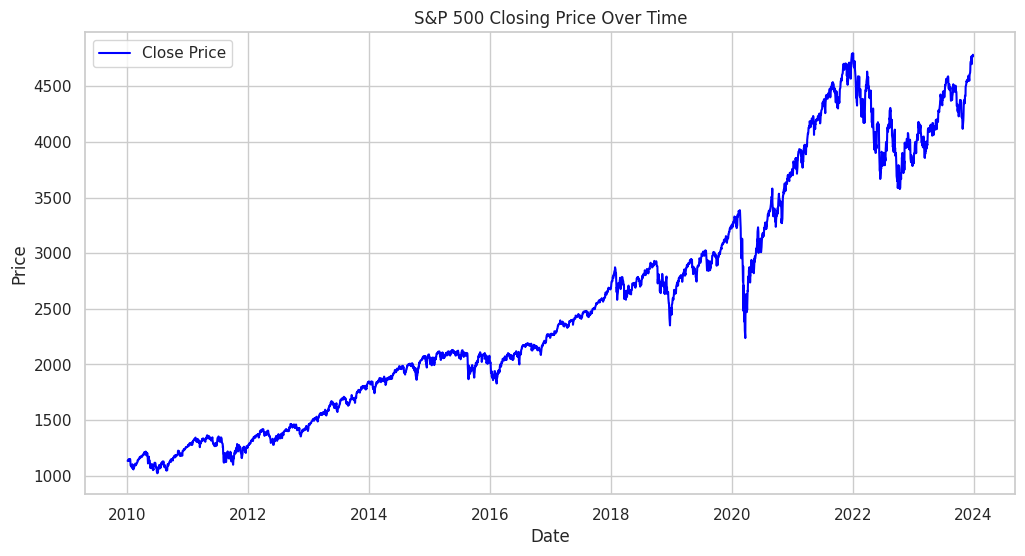

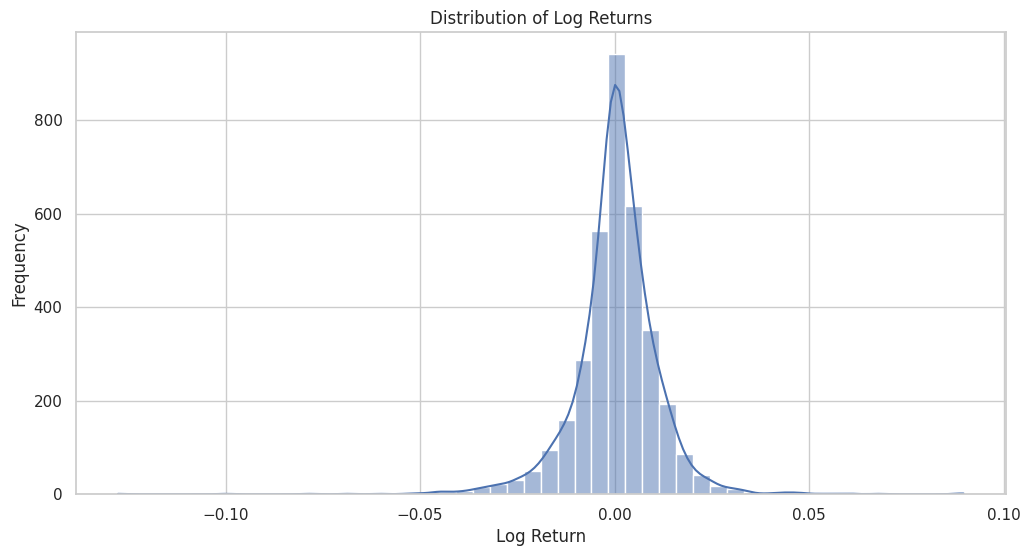

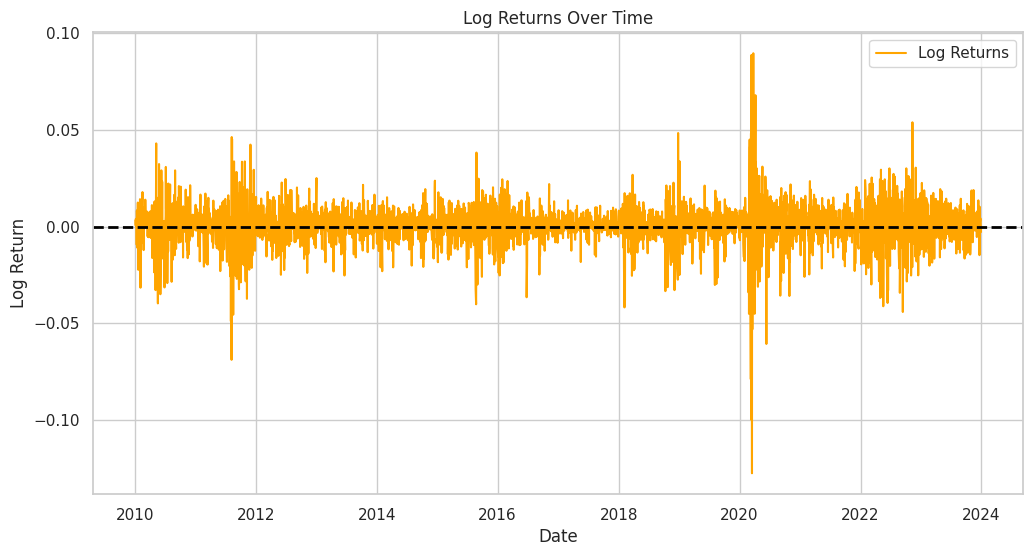

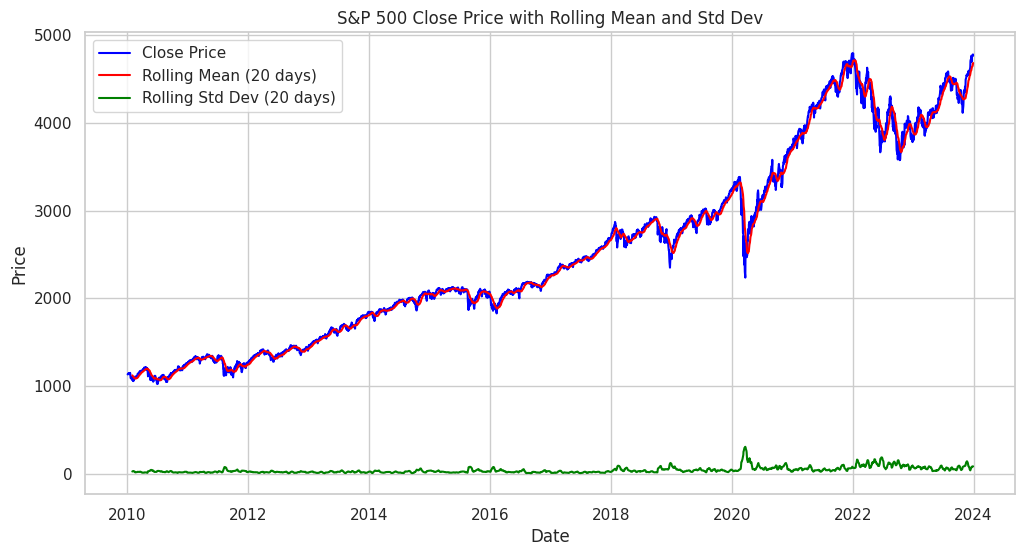

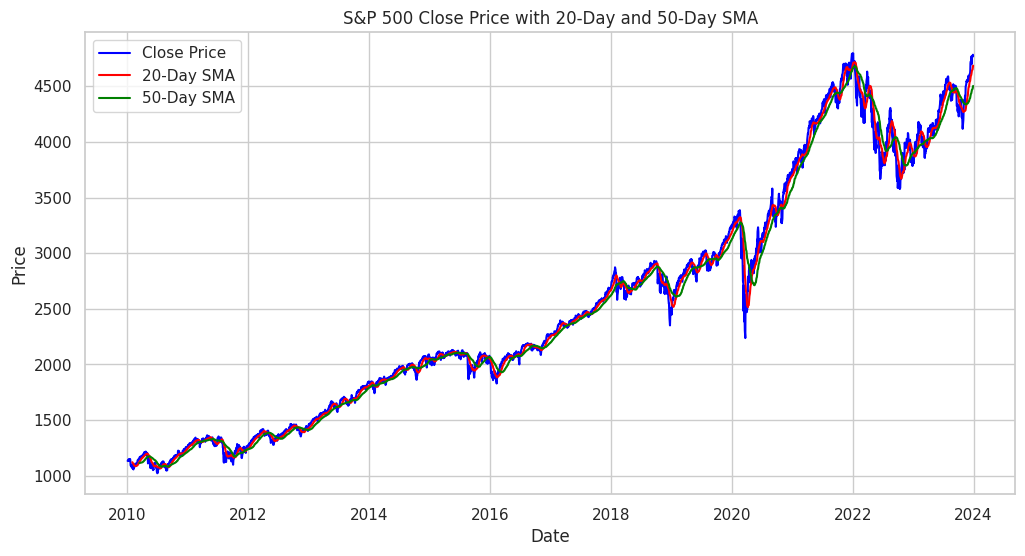

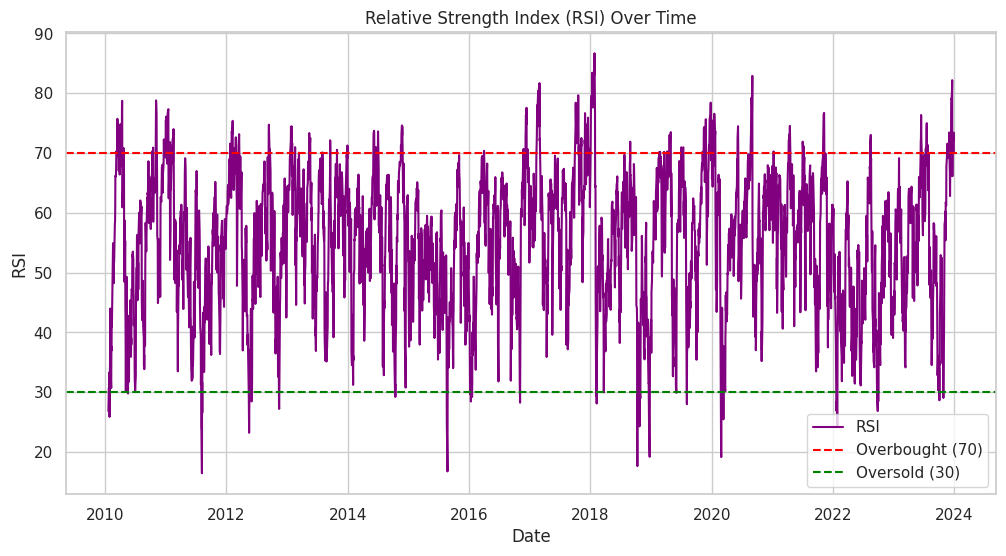

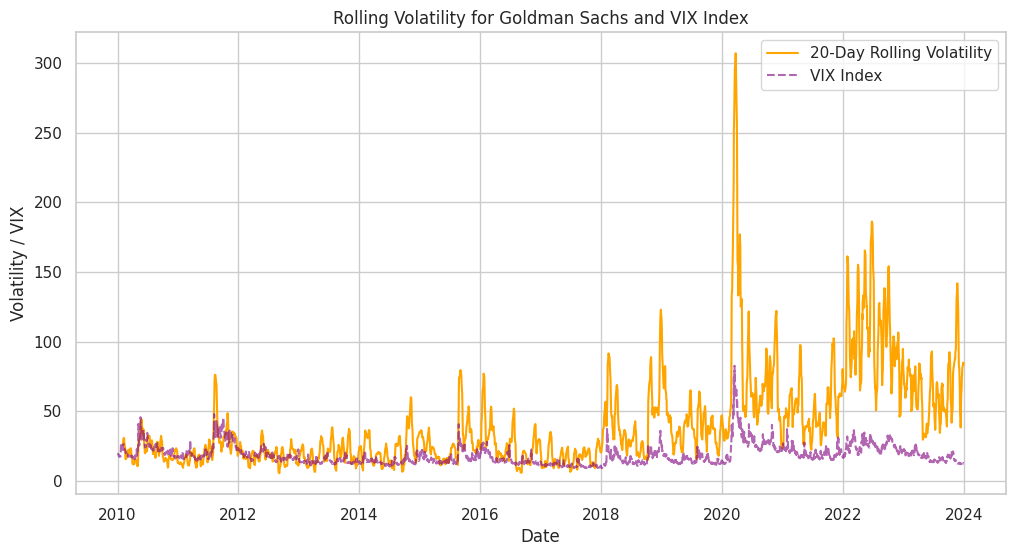

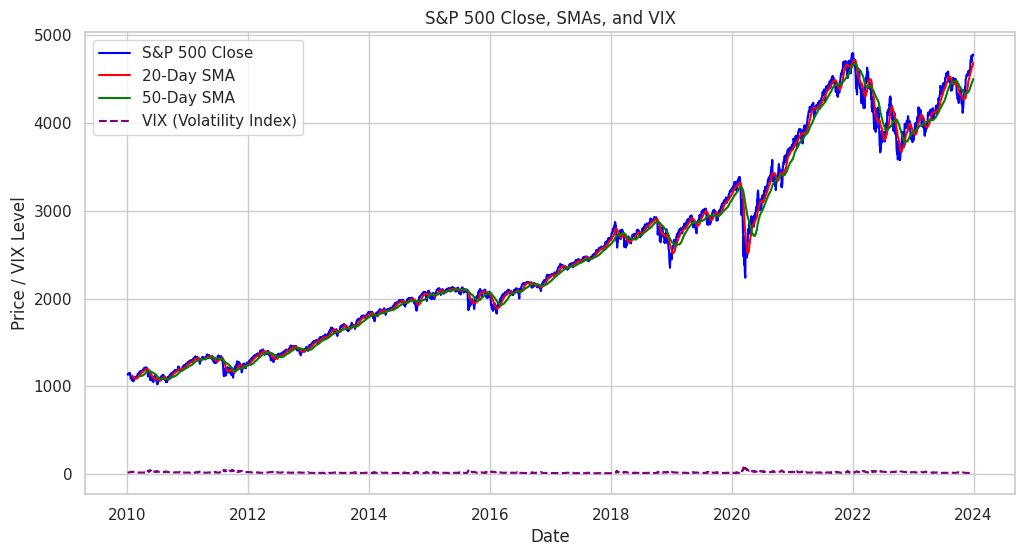

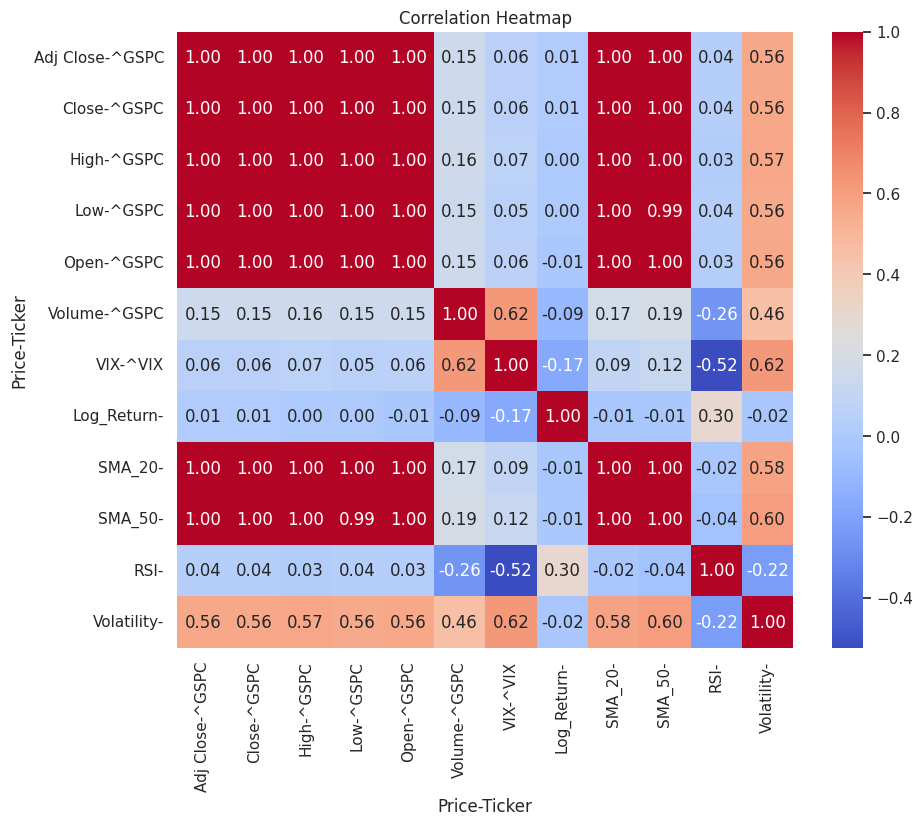

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta

sns.set(style='whitegrid')

ticker = '^GSPC'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01', interval='1d')

vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01', interval='1d')
vix = vix[['Close']].rename(columns={'Close': 'VIX'})

data = data.join(vix, how='inner')

print("First few rows of the dataset:")
print(data.head())

print("\nMissing values in the dataset:")
print(data.isnull().sum())

data.dropna(inplace=True)

# log returns
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))

# Creating additional features like 20-day simple moving average, 50-day moving average, RSI and Rolling Std
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = ta.momentum.RSIIndicator(data['Close'].squeeze()).rsi()
data['Volatility'] = data['Close'].rolling(window=20).std()

print("\nCleaned data with additional features:")
print(data.head())

# Summary Statistics
print("\nSummary statistics:")
print(data.describe())

# Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Log Returns Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Log_Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()

# Time Series of Log Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Log_Return'], label='Log Returns', color='orange')
plt.title('Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.axhline(0, color='black', lw=2, linestyle='--')
plt.legend()
plt.show()

# Rolling Mean and Standard Deviation
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (20 days)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (20 days)', color='green')
plt.title('S&P 500 Close Price with Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.title('S&P 500 Close Price with 20-Day and 50-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Volatility vs VIX
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='20-Day Rolling Volatility', color='orange')
plt.plot(data['VIX'], label='VIX Index', color='purple', linestyle='--', alpha=0.6)
plt.title('Rolling Volatility for Goldman Sachs and VIX Index')
plt.xlabel('Date')
plt.ylabel('Volatility / VIX')
plt.legend()
plt.show()

# VIX
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='S&P 500 Close', color='blue')
plt.plot(data['SMA_20'], label='20-Day SMA', color='red')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['VIX'], label='VIX (Volatility Index)', color='purple', linestyle='--')
plt.title('S&P 500 Close, SMAs, and VIX')
plt.xlabel('Date')
plt.ylabel('Price / VIX Level')
plt.legend()
plt.show()


# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Linear Regression Mean Squared Error: 0.0021200329455035027
Linear Regression R-squared Score: 0.7995493711292042


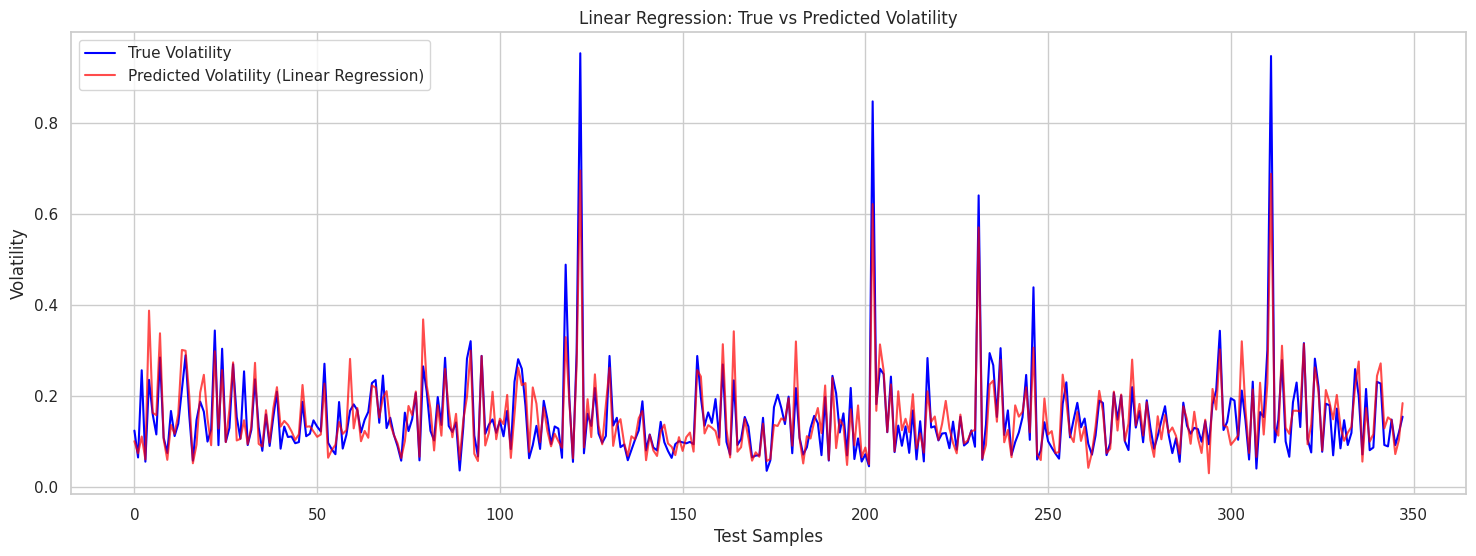

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download S&P 500 data
data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')
data = data[['Close']]

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
data['Volatility'] = data['Log_Return'].rolling(window=21).std() * np.sqrt(252)

# Calculate RSI (Relative Strength Index)
delta = data['Log_Return'].dropna()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Download VIX data
vix = yf.download('^VIX', start='2010-01-01', end='2024-01-01')
data['VIX'] = vix['Close']

# Drop missing values
data.dropna(inplace=True)

# Features and target variable
X = data[['Close', 'SMA_20', 'SMA_50', 'RSI', 'Log_Return', 'VIX']]  # Features
y = data['Volatility']  # Target: Volatility

# Train-test-validation split: 80% training, 10% validation, 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Predictions
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Evaluation metrics for Linear Regression
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

# Print evaluation results
print("Linear Regression Mean Squared Error:", lin_reg_mse)
print("Linear Regression R-squared Score:", lin_reg_r2)

# Plot: True vs Predicted Volatility (Linear Regression)
plt.figure(figsize=(18, 6))
plt.plot(y_test.values, label='True Volatility', color='blue')
plt.plot(y_pred_lin_reg, label='Predicted Volatility (Linear Regression)', color='red', alpha=0.7)
plt.title("Linear Regression: True vs Predicted Volatility")
plt.xlabel("Test Samples")
plt.ylabel("Volatility")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2506934233837.353
Iteration:      2,   Func. Count:     15,   Neg. LLF: 5332.138460820601
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3072.259918672082
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3243.4063840780755
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2396.8898785638476
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2388.9430432735767
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2388.8995148111403
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2388.898414797186
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2388.898403284299
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2388.8983971687694
Iteration:     11,   Func. Count:     68,   Neg. LLF: 2388.8983971691605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2388.8983971687694
            Iterations: 11
            Function evaluations: 68
            Gradient evaluati

KeyError: ['actual_volatility']

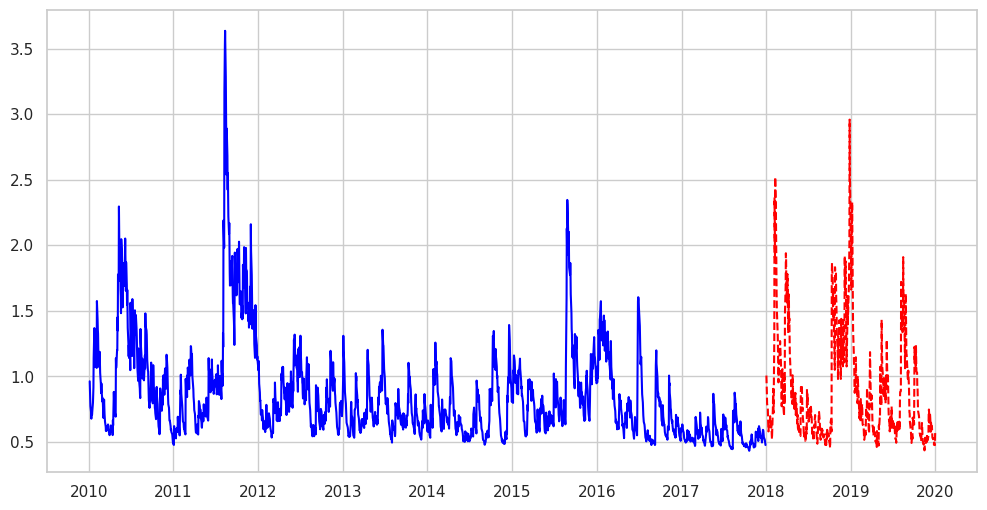

In [ ]:
#simple GARCH

import yfinance as yf
import numpy as np
import pandas as pd
from arch import arch_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Download VIX data (Implied Volatility)
vix = yf.download('^VIX', start=start_date, end=end_date)
data['VIX'] = vix['Close']  # Use VIX closing price as an external regressor

# Drop NaN values
data.dropna(inplace=True)

# Step 2: Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Step 3: Fit GARCH Model with VIX as an exogenous regressor on training data

# Prepare the GARCH model with VIX as an external regressor
model_garch = arch_model(train_data['return'] * 100, vol='Garch', p=1, q=1, x=train_data['VIX'])
garch_result = model_garch.fit()

# Print GARCH model results
print(garch_result.summary())

# Step 4: Get the GARCH volatility estimate for training data
train_garch_volatility = garch_result.conditional_volatility
train_data['garch_volatility'] = train_garch_volatility

# Step 5: Generate GARCH Volatility forecasts for the test data

# We need to fit a new GARCH model on the test data to make predictions.
# For simplicity, let's predict volatility using the last values of the training set.

# Prepare the model with VIX for test data
model_garch_test = arch_model(test_data['return'] * 100, vol='Garch', p=1, q=1, x=test_data['VIX'])
garch_result_test = model_garch_test.fit()

# Get the predicted GARCH volatility for the test data
test_garch_volatility = garch_result_test.conditional_volatility
test_data['garch_volatility'] = test_garch_volatility

# Step 6: Visualize the Predicted vs Actual Volatility

plt.figure(figsize=(12, 6))

# Plot actual vs predicted volatility (GARCH Volatility) for training and test data
plt.plot(train_data.index, train_data['garch_volatility'], label='Train GARCH Volatility', color='blue')
plt.plot(test_data.index, test_data['garch_volatility'], label='Test GARCH Volatility (Predicted)', color='red', linestyle='--')

# Calculate and plot the actual volatility (21-day rolling window for standard deviation) on test data
test_data['actual_volatility'] = test_data['return'].rolling(window=21).std() * np.sqrt(252)
test_data.dropna(subset=['actual_volatility'], inplace=True)
plt.plot(test_data.index, test_data['actual_volatility'], label='Actual Volatility', color='green')

plt.title('GARCH Volatility Forecasting: Predicted vs Actual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Step 7: Evaluate the GARCH Model Performance (MSE and R²)

# Calculate Mean Squared Error (MSE) for the test set
mse = mean_squared_error(test_data['actual_volatility'], test_data['garch_volatility'])
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R-squared (R²) for the test set
r2 = r2_score(test_data['actual_volatility'], test_data['garch_volatility'])
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3196053.121254978
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12712762060.94161
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4240.427539426197
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4167.421668956445
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3013.915670678073
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3001.6749490883176
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3001.641705618438
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3001.637935459459
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3001.637093967207
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3001.637080694408
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3001.637080694405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3001.637080694408
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0104
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0022
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


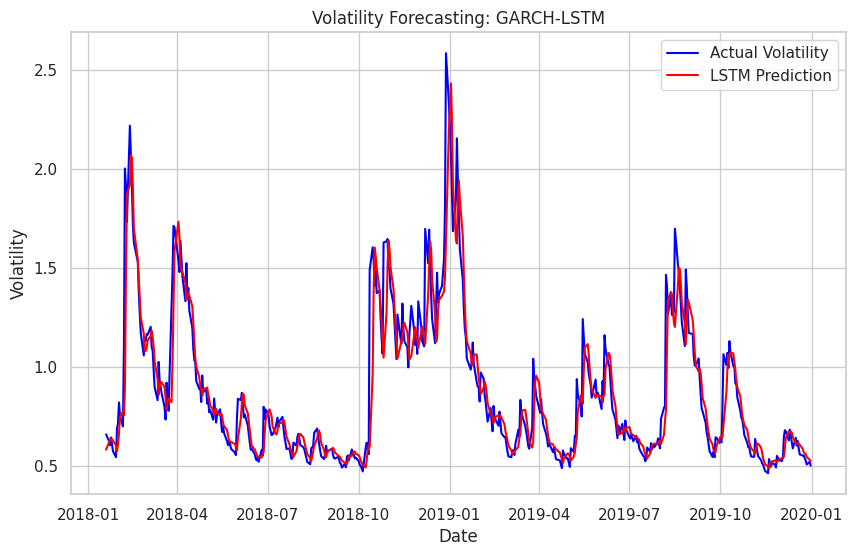

Mean Squared Error (MSE): 0.021249
R-squared (R²): 0.847391


In [ ]:
# GARCH-LSTM

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Model 1 - GARCH with LSTM (Volatility Forecasting)

# 2.1 Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# 2.2 Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# 2.3 Scale the GARCH volatility for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility = scaler.fit_transform(data['garch_volatility'].values.reshape(-1, 1))

# 2.4 Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), 0])  # LSTM input: past volatility
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_volatility)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 5: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original values
lstm_pred = scaler.inverse_transform(lstm_pred)

# Step 6: Visualize Predictions
plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for LSTM
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting: GARCH-LSTM')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_pred)
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3196053.121254978
Iteration:      2,   Func. Count:     15,   Neg. LLF: 12712762060.94161
Iteration:      3,   Func. Count:     23,   Neg. LLF: 4240.427539426197
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4167.421668956445
Iteration:      5,   Func. Count:     37,   Neg. LLF: 3013.915670678073
Iteration:      6,   Func. Count:     43,   Neg. LLF: 3001.6749490883176
Iteration:      7,   Func. Count:     48,   Neg. LLF: 3001.641705618438
Iteration:      8,   Func. Count:     53,   Neg. LLF: 3001.637935459459
Iteration:      9,   Func. Count:     58,   Neg. LLF: 3001.637093967207
Iteration:     10,   Func. Count:     63,   Neg. LLF: 3001.637080694408
Iteration:     11,   Func. Count:     67,   Neg. LLF: 3001.637080694405
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3001.637080694408
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 1

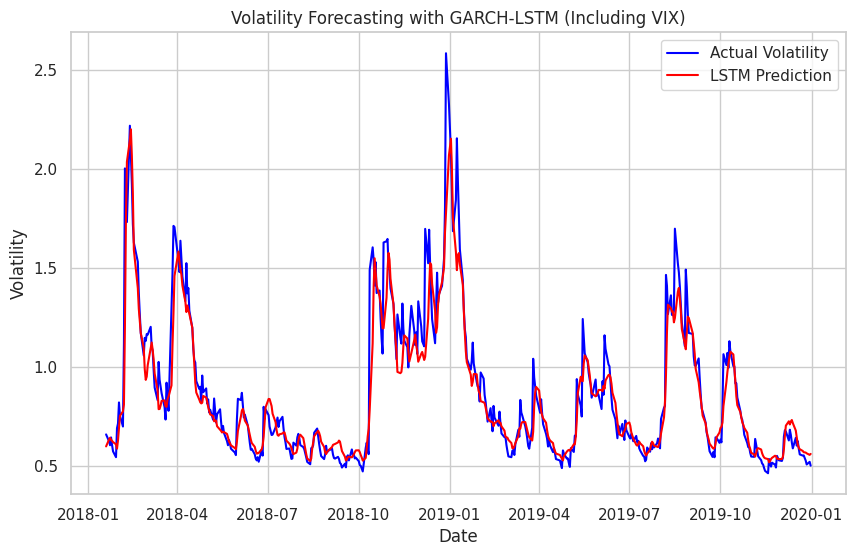

In [ ]:
# GARCH-LSTM (with VIX)

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the S&P 500 data
data = yf.download(ticker, start=start_date, end=end_date)

# Download the VIX data
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Align the VIX data with the S&P 500 data
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# Step 2: Model 1 - GARCH with LSTM (Volatility Forecasting)

# 2.1 Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# 2.2 Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# 2.3 Scale the GARCH volatility and VIX for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['garch_volatility', 'vix']].values)

# Step 3: Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), :])  # LSTM input: past volatility and VIX
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Input shape: (samples, time steps, features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 6: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original volatility values
lstm_pred = scaler.inverse_transform(np.concatenate([lstm_pred, np.zeros((lstm_pred.shape[0], 1))], axis=1))[:, 0]

# Step 7: Evaluate the model and calculate metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], lstm_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], lstm_pred)
print(f"R-squared (R²): {r2:.6f}")

# Step 8: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for LSTM
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with GARCH-LSTM (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8867808478.479439
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2090473902.1358948
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6649.519167095133
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5415.3151420678105
Iteration:      5,   Func. Count:     36,   Neg. LLF: 5705.353534020161
Iteration:      6,   Func. Count:     42,   Neg. LLF: 4806.46117564615
Iteration:      7,   Func. Count:     47,   Neg. LLF: 4806.449793851694
Iteration:      8,   Func. Count:     52,   Neg. LLF: 4806.448341571813
Iteration:      9,   Func. Count:     57,   Neg. LLF: 4806.44834085084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4806.44834085084
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9
Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 3/10
93/93

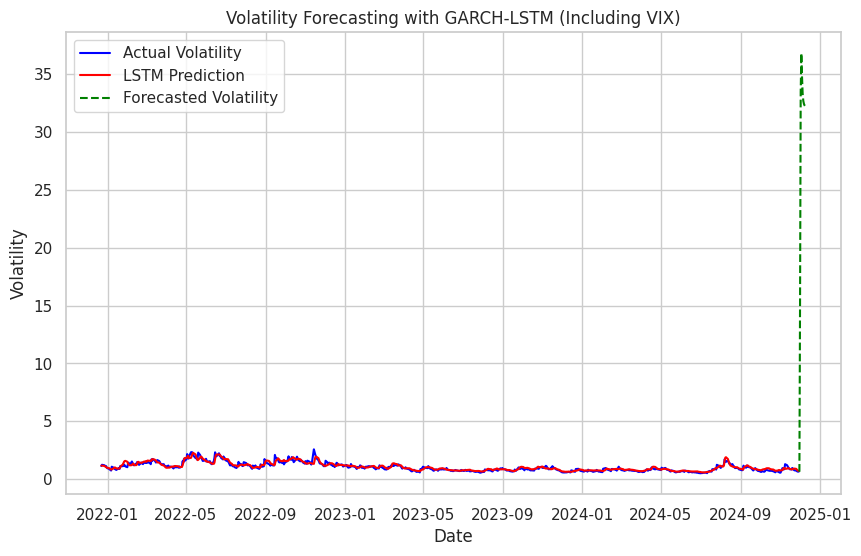

Forecasted Volatility for 2024-11-30: 0.6415
Forecasted Volatility for 2024-12-01: 15.2108
Forecasted Volatility for 2024-12-02: 33.4520
Forecasted Volatility for 2024-12-03: 36.7967
Forecasted Volatility for 2024-12-04: 34.8281
Forecasted Volatility for 2024-12-05: 33.3175
Forecasted Volatility for 2024-12-06: 32.6815
Forecasted Volatility for 2024-12-07: 32.4190
Forecasted Volatility for 2024-12-08: 32.2876
Forecasted Volatility for 2024-12-09: 32.2113
Forecasted Volatility for 2024-12-10: 32.1638


In [ ]:
#Prediction

import yfinance as yf
import numpy as np
import tensorflow as tf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # Corrected S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2024-12-01'    # End date for data download

# Download the S&P 500 data
data = yf.download(ticker, start=start_date, end=end_date)

# Download the VIX data
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Align the VIX data with the S&P 500 data
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# Step 2: Fit GARCH model to estimate volatility
model_garch = arch_model(data['return'] * 100, vol='Garch', p=1, q=1)
garch_result = model_garch.fit()

# Get the GARCH volatility estimate
garch_volatility = garch_result.conditional_volatility
data['garch_volatility'] = garch_volatility

# Step 3: Scale the GARCH volatility and VIX for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['garch_volatility', 'vix']].values)

# Step 4: Prepare the data for LSTM (using past 60 time-steps to predict next)
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), :])  # LSTM input: past volatility and VIX
        y.append(volatility[i + time_step, 0])      # LSTM output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Input shape: (samples, time steps, features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 7: Predict volatility using the LSTM model
lstm_pred = model_lstm.predict(X_test)

# Inverse scaling to get original volatility values
lstm_pred = scaler.inverse_transform(np.concatenate([lstm_pred, np.zeros((lstm_pred.shape[0], 1))], axis=1))[:, 0]

# Step 8: Forecasting for future days until December 10, 2024

# Start with the last 60 time steps of the original data for forecasting
last_time_steps = scaled_data[-60:]  # Last 60 time steps (scaled)

# Define the number of days to forecast
forecast_days = (pd.to_datetime('2024-12-10') - data.index[-1]).days

# Store the predictions
predictions = []
dates = []

# Forecasting loop
for i in range(forecast_days):
    # Reshape to be compatible with the LSTM model input
    last_time_steps = last_time_steps.reshape((1, 60, 2))  # 1 sample, 60 time steps, 2 features (volatility and vix)

    # Predict the next volatility
    predicted_volatility = model_lstm.predict(last_time_steps)

    # Inverse scaling to get the original predicted volatility
    predicted_volatility = scaler.inverse_transform(np.concatenate([predicted_volatility, np.zeros((predicted_volatility.shape[0], 1))], axis=1))[:, 0]

    # Get the most recent VIX value using ffill
    predicted_date = data.index[-1] + pd.Timedelta(days=i+1)  # Next day after last date in dataset
    latest_vix = vix_data['Adj Close'].reindex([predicted_date], method='ffill').values[0]

    # Create a new row with the predicted volatility and the most recent VIX value
    new_data = np.array([[predicted_volatility[0], latest_vix.item()]])

    # Ensure that the new data is a 2D array with shape (1, 2)
    if new_data.shape != (1, 2):
        raise ValueError(f"Expected new_data shape (1, 2), but got {new_data.shape}")

    # Update the last_time_steps with the new prediction (shifting the window)
    last_time_steps = np.vstack([last_time_steps[0][1:], new_data])

    # Store the forecasted value and its corresponding date
    predictions.append(predicted_volatility[0])
    dates.append(predicted_date)

# Step 9: Plotting the forecasted volatility

plt.figure(figsize=(10, 6))

# Plot actual volatility
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')

# Plot the predicted volatility
plt.plot(data.index[-len(lstm_pred):], lstm_pred, label='LSTM Prediction', color='red')

# Plot the forecasted volatility for the next days
plt.plot(dates, predictions, label='Forecasted Volatility', color='green', linestyle='dashed')

plt.legend()
plt.title('Volatility Forecasting with GARCH-LSTM (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Print the forecasted values for December 2024
for forecast_date, forecast_value in zip(dates, predictions):
    print(f"Forecasted Volatility for {forecast_date.date()}: {forecast_value:.4f}")

[*********************100%***********************]  1 of 1 completed


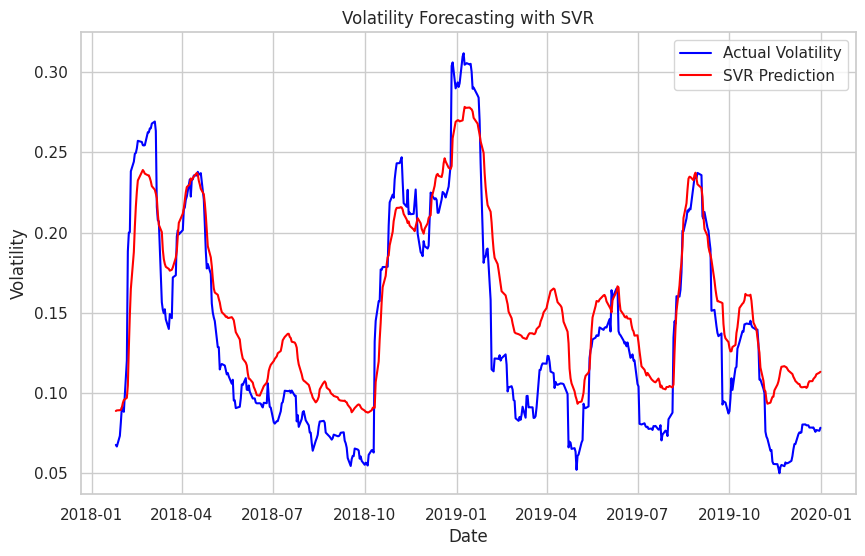

Mean Squared Error (MSE): 0.000957
R-squared (R²): 0.782936


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbol and try again.")

# Calculate daily returns
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for SVR model

# 2.1: Use rolling window to calculate historical volatility (standard deviation of returns)
window_size = 20  # Using 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# 2.2: Scale the volatility for SVR input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_volatility = scaler.fit_transform(data['volatility'].values.reshape(-1, 1))

# 2.3: Prepare the data for SVR
def create_dataset(volatility, time_step=60):
    X, y = [], []
    for i in range(len(volatility) - time_step - 1):
        X.append(volatility[i:(i + time_step), 0])  # SVR input: past volatility
        y.append(volatility[i + time_step, 0])      # SVR output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_volatility)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Build the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# 3.1: Train the SVR model
svr_model.fit(X_train, y_train)

# Step 4: Predict volatility using the SVR model
svr_pred = svr_model.predict(X_test)

# Inverse scaling to get original volatility values
svr_pred = scaler.inverse_transform(svr_pred.reshape(-1, 1))

# Step 5: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for SVR
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Volatility', color='blue')
plt.plot(data.index[-len(svr_pred):], svr_pred, label='SVR Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with SVR')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 6: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), svr_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), svr_pred)
print(f"R-squared (R²): {r2:.6f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


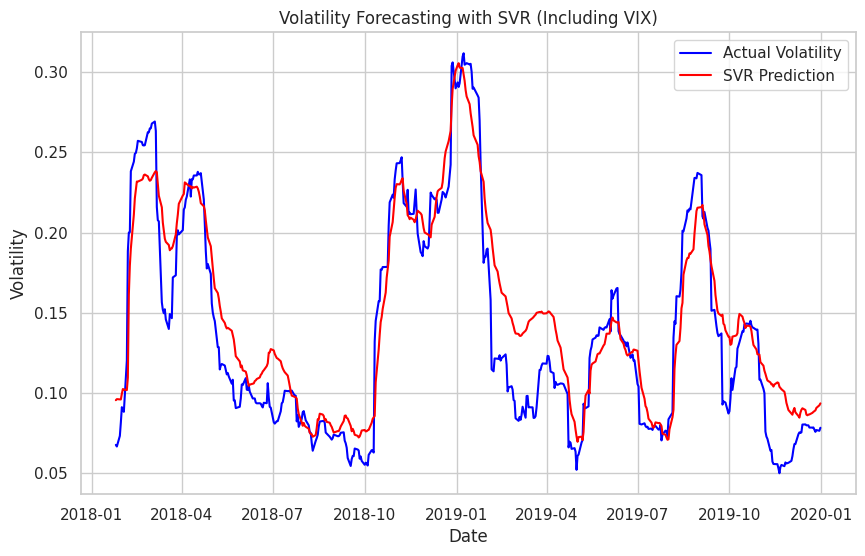

Mean Squared Error (MSE): 0.000685
R-squared (R²): 0.844710


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download the data from Yahoo Finance
ticker = '^GSPC'  # S&P 500 Index ticker symbol
vix_ticker = '^VIX'  # VIX (Volatility Index)
start_date = '2010-01-01'  # Start date for data download
end_date = '2020-01-01'    # End date for data download

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)

# Check if data was successfully downloaded
if data.empty or vix_data.empty:
    raise ValueError("No data downloaded. Please check the ticker symbols and try again.")

# Calculate daily returns for the S&P 500 data
data['return'] = data['Adj Close'].pct_change()

# Drop NaN values created by pct_change
data = data.dropna()

# Step 2: Preprocess the data for SVR model

# 2.1: Use rolling window to calculate historical volatility (standard deviation of returns)
window_size = 20  # Using 20-day rolling window for volatility estimation
data['volatility'] = data['return'].rolling(window=window_size).std() * np.sqrt(252)  # Annualized volatility

# Drop NaN values caused by rolling window
data = data.dropna()

# 2.2: Add VIX data to the dataset
data['vix'] = vix_data['Adj Close'].reindex(data.index, method='ffill')

# 2.3: Scale the volatility and VIX for SVR input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['volatility', 'vix']].values)

# Step 3: Prepare the data for SVR (using past 60 time-steps to predict next)
def create_dataset(features, time_step=60):
    X, y = [], []
    for i in range(len(features) - time_step - 1):
        X.append(features[i:(i + time_step), :])  # SVR input: past volatility and VIX
        y.append(features[i + time_step, 0])      # SVR output: future volatility
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# 4.1: Train the SVR model
svr_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Step 5: Predict volatility using the SVR model
svr_pred = svr_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse scaling to get original volatility values
svr_pred = scaler.inverse_transform(np.concatenate([svr_pred.reshape(-1, 1), np.zeros((svr_pred.shape[0], 1))], axis=1))[:, 0]

# Step 6: Visualize Predictions

plt.figure(figsize=(10, 6))

# Plot actual vs predicted volatility for SVR
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], label='Actual Volatility', color='blue')
plt.plot(data.index[-len(svr_pred):], svr_pred, label='SVR Prediction', color='red')

plt.legend()
plt.title('Volatility Forecasting with SVR (Including VIX)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

# Step 7: Evaluation Metrics (MSE and R²)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], svr_pred)
print(f"Mean Squared Error (MSE): {mse:.6f}")

# Calculate R² (R-squared)
r2 = r2_score(scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0], svr_pred)
print(f"R-squared (R²): {r2:.6f}")